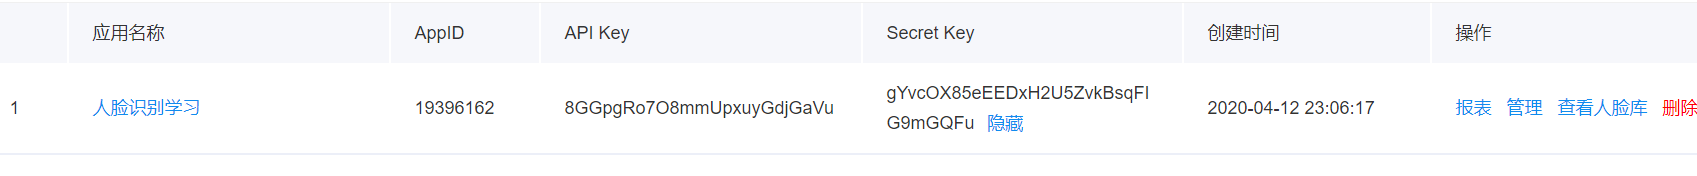

In [ ]:
import sys
from PyQt5.QtCore import *
from PyQt5.QtGui import *
from PyQt5.QtWidgets import *
import requests
import base64
import json


'''
作者：pk哥
文章首发公众号：Python知识圈，欢迎关注
完成日期：2020/03/02
如疑问或需转载，请加我微信留言，备注来意，谢谢。
'''

header = {
            'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; Win64; x64; rv:69.0) Gecko/20100101 Firefox/69.0'
        }
def get_access_token():
    client_id = '8GGpgRo7O8mmUpxuyGdjGaVu' #API Key
    client_secret = 'gYvcOX85eEEDxH2U5ZvkBsqFIG9mGQFu' #Secret Key
    url='https://aip.baidubce.com/oauth/2.0/token?grant_type=client_credentials&' \
        'client_id={0}&client_secret={1}'.format(client_id,client_secret)
    data=requests.get(url, headers=header)
    access_token=json.loads(data.text)['access_token']
    return access_token

class Window(QWidget):
    def __init__(self, parent=None):
        super().__init__(parent)
        self.setWindowTitle("颜值识别工具")
        self.setWindowIcon(QIcon('图标.jpg'))
        self.layout = QGridLayout()
        self.setLayout(self.layout)  # 局部布局

        self.fileText = QTextBrowser()
        self.fileText.setText('请选择图片路径')
        self.fileText.setFixedSize(110, 25)
        self.layout.addWidget(self.fileText, 0, 0, Qt.AlignCenter)

        self.pathText = QLineEdit(self)
        self.pathText.setFixedSize(210, 25)
        self.layout.addWidget(self.pathText, 0, 1, Qt.AlignCenter)

        self.pathPushButton = QPushButton("浏览")
        self.pathPushButton.setFixedSize(60, 40)
        self.pathPushButton.clicked.connect(self.setBrowerPath)
        self.layout.addWidget(self.pathPushButton, 0, 2, Qt.AlignCenter)


        self.startPushButton = QPushButton("开始识别")
        self.startPushButton.setFixedSize(60, 40)
        self.startPushButton.clicked.connect(self.start)
        self.layout.addWidget(self.startPushButton, 1, 1, Qt.AlignCenter)

        self.genderText = QTextBrowser()
        self.genderText.setText('性别')
        self.genderText.setFixedSize(60, 25)
        self.layout.addWidget(self.genderText, 3, 0)

        self.genderLine = QLineEdit(self)
        self.genderLine.setFixedSize(60, 25)
        self.layout.addWidget(self.genderLine, 3, 1)

        self.ageText = QTextBrowser()
        self.ageText.setText('年龄')
        self.ageText.setFixedSize(60, 25)
        self.layout.addWidget(self.ageText, 4, 0)

        self.ageLine = QLineEdit(self)
        self.ageLine.setFixedSize(60, 25)
        self.layout.addWidget(self.ageLine, 4, 1)

        self.beautyText = QTextBrowser()
        self.beautyText.setText('颜值')
        self.beautyText.setFixedSize(60, 25)
        self.layout.addWidget(self.beautyText, 5, 0)

        self.beautyLine = QLineEdit(self)
        self.beautyLine.setFixedSize(60, 25)
        self.layout.addWidget(self.beautyLine, 5, 1)
    
    def setBrowerPath(self):
        dig=QFileDialog()
        dig.setFileMode(QFileDialog.AnyFile)  # 设置可以打开任何文件
        dig.setFilter(QDir.Files) # 文件过滤
        if dig.exec_():
            # 接受选中文件的路径，默认为列表
            filenames = dig.selectedFiles()
            self.picfile=filenames[0]
            self.pathText.setText(self.picfile)
            # 列表中的第一个元素即是文件路径，以只读的方式打开文件
    
    def start(self):
        print(11111)
        with open('{0}'.format(self.picfile), 'rb') as f:
            base = base64.b64encode(f.read())
            img = str(base, encoding='utf-8')
        params = {
            'image': img,
            'image_type': 'BASE64',
            'face_field': 'age,beauty,gender,face_type,face_shape,expression,landmark'
        }

        url = 'https://aip.baidubce.com/rest/2.0/face/v3/detect?access_token={0}'.format(get_access_token())
        results = requests.post(url, data=params, headers=header)
        results = json.loads(results.text)

        if results['error_msg'] == "SUCCESS":
            self.beauty = results['result']['face_list'][0]['beauty']
            self.gender = results['result']['face_list'][0]['gender']['type']
            self.age = results['result']['face_list'][0]['age']
            print(self.beauty, self.gender, self.age)
            if self.gender=='male':
                self.gender='男'
            elif self.gender=='female':
                self.gender='女'
            self.genderLine.setText(self.gender)
            self.ageLine.setText(str(self.age))
            self.beautyLine.setText(str(self.beauty))

    def closeEvent(self, event):
        reply = QMessageBox.question(self, 'Message',
                                     "Are you sure to quit?", QMessageBox.Yes |
                                     QMessageBox.No, QMessageBox.No)
        if reply == QMessageBox.Yes:
            event.accept()
        else:
            event.ignore()
            
app = QApplication(sys.argv)
show = Window()  # 主窗口的类
show.setFixedSize(500, 200)
show.show()
sys.exit(app.exec_())
